In [ ]:
Import Packages

In [16]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
Load Data

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
Analysing Data

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
y_train[2]

4

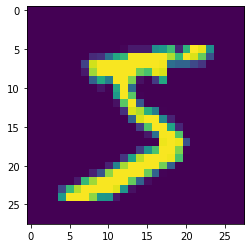

In [21]:
plt.imshow(X_train[0])

In [ ]:
Data preprocessing

In [22]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [23]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Model Creating

In [24]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [ ]:
Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.2382 - accuracy: 0.9521 - val_loss: 0.1081 - val_accuracy: 0.9691
Epoch 2/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0714 - accuracy: 0.9784 - val_loss: 0.0927 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.0857 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.1040 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.1449 - val_accuracy: 0.9688


In [ ]:
Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.14486223459243774, 0.9688000082969666]


In [26]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[7.1145958e-01 7.5653532e-11 2.0369472e-01 5.1774261e-08 2.9802815e-05
  1.4206857e-05 7.8732399e-03 7.6928400e-02 7.9492229e-12 3.3473210e-08]
 [1.0000000e+00 2.1341095e-14 6.4001095e-16 1.1026420e-16 3.1304303e-15
  5.8030586e-14 1.3201247e-13 3.2956514e-08 1.2933309e-08 5.2427417e-16]
 [6.6201788e-01 2.8805651e-08 1.0761465e-04 1.2095169e-08 3.5894342e-02
  2.5307661e-02 5.6494989e-02 9.3966511e-05 2.2005288e-01 3.0618212e-05]
 [9.9994862e-01 8.6023068e-20 5.1377305e-05 2.7663509e-18 8.3744196e-14
  7.8402718e-10 8.1450837e-14 2.0866541e-18 5.5391997e-10 1.0524077e-23]]


In [27]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[0 0 0 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
